<a href="https://colab.research.google.com/github/SSaprativa/Deep_Learning/blob/main/feedforwardNetworkpytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook
import seaborn as sns
import time
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

import torch

In [4]:
torch.manual_seed(0)

In [5]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

## Generating data

In [6]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


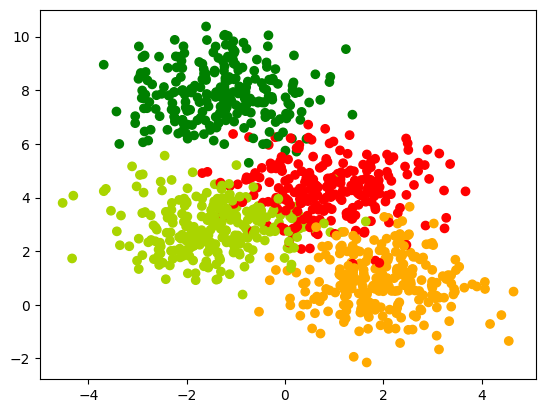

In [7]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [8]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape, labels.shape)

(750, 2) (250, 2) (1000,)


In [9]:
#converting all of them into tensors
X_train, X_val, Y_train, Y_val = map(torch.tensor,(X_train, X_val, Y_train, Y_val))

In [10]:
print(X_train.shape,Y_train.shape)

torch.Size([750, 2]) torch.Size([750])


## Using torch tensor and autograd

In [11]:
def model(x):
    a1 = torch.matmul(x,weights1)+bias1 #(1,2)*(2,2) = (1,2)
    h1 = a1.sigmoid() # (1,2)
    a2 = torch.matmul(h1,weights2)+bias2 #(1,2) * (2,4) = (1,4)
    h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1) #(4,1)
    return h2

def loss_fn(y_hat,y):
    return (-y_hat[range(y_hat.shape[0]),y].log().mean()) # cross entropy loss, removed .item()

def accuracy(y_hat, y):
  pred = torch.argmax(y_hat, dim=1)
  return (pred == y).float().mean()

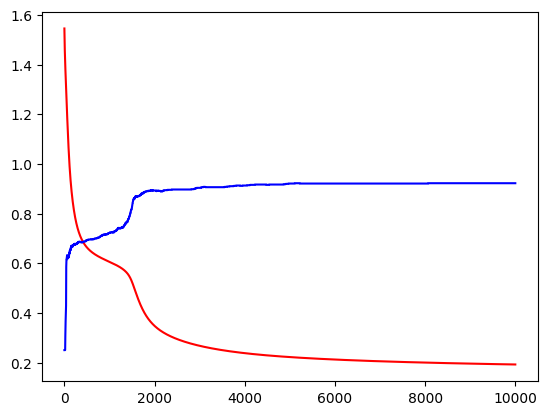

Loss before training 1.5456440448760986
Loss after training 0.19288596510887146


In [12]:
torch.manual_seed(0)
weights1 = torch.randn(2, 2) / math.sqrt(2)
weights1.requires_grad_()
bias1 = torch.zeros(2, requires_grad=True)

weights2 = torch.randn(2, 4) / math.sqrt(2)
weights2.requires_grad_()
bias2 = torch.zeros(4, requires_grad=True)

learning_rate = 0.2
epochs = 10000

X_train = X_train.float()
Y_train = Y_train.long()

loss_arr = []
acc_arr = []

for epoch in range(epochs):
  y_hat = model(X_train)
  loss = loss_fn(y_hat, Y_train)
  loss.backward()
  loss_arr.append(loss.item())
  acc_arr.append(accuracy(y_hat, Y_train))

  with torch.no_grad():
    weights1 -= weights1.grad * learning_rate
    bias1 -= bias1.grad * learning_rate
    weights2 -= weights2.grad * learning_rate
    bias2 -= bias2.grad * learning_rate
    weights1.grad.zero_()
    bias1.grad.zero_()
    weights2.grad.zero_()
    bias2.grad.zero_()

plt.plot(loss_arr, 'r-')
plt.plot(acc_arr, 'b-')
plt.show()
print('Loss before training', loss_arr[0])
print('Loss after training', loss_arr[-1])

In [13]:
import torch.nn.functional as F

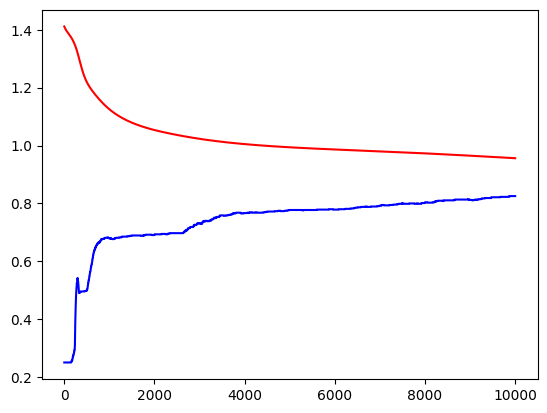

Loss before training 1.4111982583999634
Loss after training 0.9561847448348999


In [14]:
torch.manual_seed(0)
weights1 = torch.randn(2, 2) / math.sqrt(2)
weights1.requires_grad_()
bias1 = torch.zeros(2, requires_grad=True)

weights2 = torch.randn(2, 4) / math.sqrt(2)
weights2.requires_grad_()
bias2 = torch.zeros(4, requires_grad=True)

learning_rate = 0.2
epochs = 10000

X_train = X_train.float()
Y_train = Y_train.long()

loss_arr = []
acc_arr = []

for epoch in range(epochs):
  y_hat = model(X_train)
  loss = F.cross_entropy(y_hat, Y_train)
  loss.backward()
  loss_arr.append(loss.item())
  acc_arr.append(accuracy(y_hat, Y_train))

  with torch.no_grad():
    weights1 -= weights1.grad * learning_rate
    bias1 -= bias1.grad * learning_rate
    weights2 -= weights2.grad * learning_rate
    bias2 -= bias2.grad * learning_rate
    weights1.grad.zero_()
    bias1.grad.zero_()
    weights2.grad.zero_()
    bias2.grad.zero_()

plt.plot(loss_arr, 'r-')
plt.plot(acc_arr, 'b-')
plt.show()
print('Loss before training', loss_arr[0])
print('Loss after training', loss_arr[-1])

## Using NN.parameter

In [15]:
import torch.nn as nn

In [16]:
class firstNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.weights1 = nn.Parameter(torch.randn(2, 2) / math.sqrt(2))
    self.bias1 = nn.Parameter(torch.zeros(2))
    self.weights2 = nn.Parameter(torch.randn(2, 4) / math.sqrt(2))
    self.bias2 = nn.Parameter(torch.zeros(4))

  def forward(self, x):
    a1 = torch.matmul(x,self.weights1)+self.bias1 #(1,2)*(2,2) = (1,2)
    h1 = a1.sigmoid() # (1,2)
    a2 = torch.matmul(h1,self.weights2)+self.bias2 #(1,2) * (2,4) = (1,4)
    h2 = a2
    return h2

In [17]:
def fit(epochs = 1000,learning_rate = 1):
  loss_arr = []
  acc_arr = []
  for epoch in range(epochs):
    y_hat = fn(X_train)
    loss = F.cross_entropy(y_hat, Y_train)
    loss.backward()
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat, Y_train))
    with torch.no_grad():
      for p in fn.parameters():
        p -= p.grad * learning_rate
      fn.zero_grad()

  plt.plot(loss_arr, 'r-')
  plt.plot(acc_arr, 'b-')
  plt.show()
  print('Loss before training', loss_arr[0])
  print('Loss after training', loss_arr[-1])

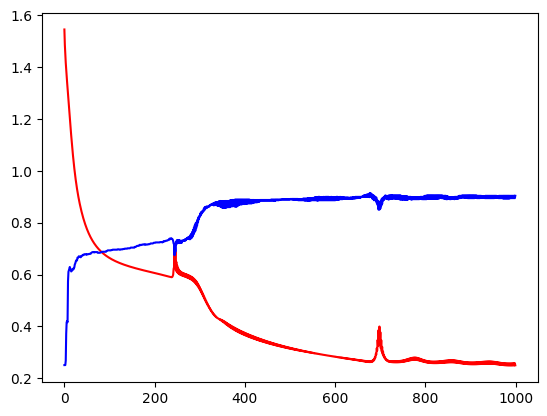

Loss before training 1.5456444025039673
Loss after training 0.24984858930110931


In [18]:
fn = firstNetwork()
fit()

## Using NN.linear and Optim

In [19]:
class First_Network_v1(nn.Module):
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.layer1 = nn.Linear(2,2)
    self.layer2 = nn.Linear(2,4)

  def forward(self, x):
    a1 = self.layer1(x)
    h1 = a1.sigmoid()
    a2 = self.layer2(h1)
    h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
    return h2

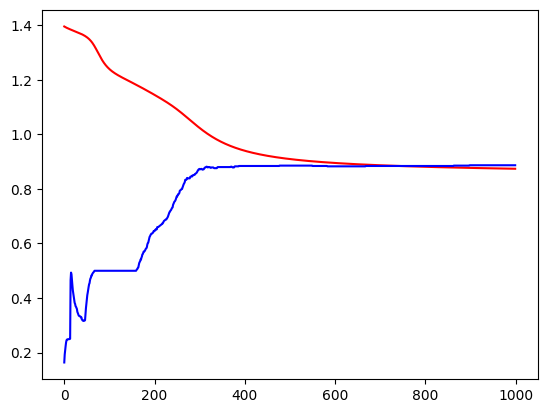

Loss before training 1.3951597213745117
Loss after training 0.873841404914856


In [20]:
fn = First_Network_v1()
fit()

In [21]:
from torch import optim

In [22]:
def fit_v1(epochs = 1000,learning_rate = 1):
  loss_arr = []
  acc_arr = []
  opt = optim.SGD(fn.parameters(), lr=learning_rate)
  for epoch in range(epochs):
    y_hat = fn(X_train)
    loss = F.cross_entropy(y_hat, Y_train)
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat, Y_train))

    loss.backward()
    opt.step()
    opt.zero_grad()

  plt.plot(loss_arr, 'r-')
  plt.plot(acc_arr, 'b-')
  plt.show()
  print('Loss before training', loss_arr[0])
  print('Loss after training', loss_arr[-1])

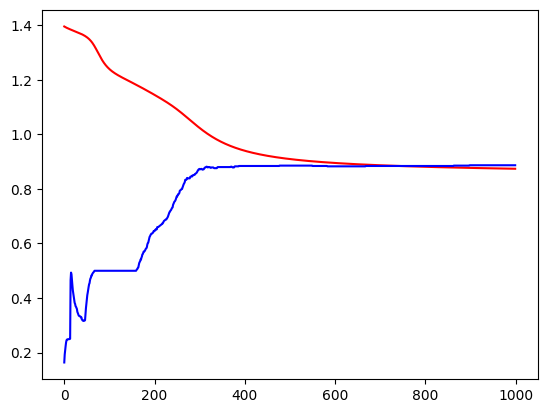

Loss before training 1.3951597213745117
Loss after training 0.873841404914856


In [23]:
fn = First_Network_v1()
fit_v1()

## Using NN.sequential

In [24]:
class firstNetwork_v2(nn.Module):
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    # Use nn.Exp instead of torch.exp
    self.net = nn.Sequential(nn.Linear(2,2), nn.Sigmoid(), nn.Linear(2,4), nn.Softmax())

  def forward(self, x):
    return self.net(x)

In [25]:
def fit_v2(x,y,model,opt,loss_fn,epochs = 1000):
  for epoch in range(epochs):
    loss = loss_fn(model(x), y)
    loss.backward()
    opt.step()
    opt.zero_grad()
  return loss.item()

In [26]:
fn = firstNetwork_v2()
opt = optim.SGD(fn.parameters(), lr=1)
loss_fn = F.cross_entropy
fit_v2(X_train, Y_train, fn, opt,loss_fn)

0.873841404914856

## GPU execution


In [29]:
device = torch.device("cuda")

X_train=X_train.to(device)
Y_train=Y_train.to(device)
fn = firstNetwork_v2()
fn.to(device)
tic = time.time()
print('Final loss', fit_v2(X_train, Y_train, fn, opt, loss_fn))
toc = time.time()
print('Time taken', toc - tic)

Final loss 1.3951594829559326
Time taken 1.814150333404541


In [30]:
class firstNetwork_v3(nn.Module):
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    # Use nn.Exp instead of torch.exp
    self.net = nn.Sequential(nn.Linear(2,128), nn.Sigmoid(), nn.Linear(128,4), nn.Softmax())

  def forward(self, x):
    return self.net(x)

In [31]:
device = torch.device("cpu")

X_train=X_train.to(device)
Y_train=Y_train.to(device)
fn = firstNetwork_v3()
fn.to(device)
tic = time.time()
print('Final loss', fit_v2(X_train, Y_train, fn, opt, loss_fn))
toc = time.time()
print('Time taken', toc - tic)

Final loss 1.398587942123413
Time taken 3.1946828365325928


In [34]:
device = torch.device("cuda")

X_train=X_train.to(device)
Y_train=Y_train.to(device)
fn = firstNetwork_v3()
fn.to(device)
tic = time.time()
print('Final loss', fit_v2(X_train, Y_train, fn, opt, loss_fn))
toc = time.time()
print('Time taken', toc - tic)

Final loss 1.398587942123413
Time taken 1.0343117713928223
